In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

01)
('2016-10-30', 0.0)
('2016-10-31', 0.13)
('2016-11-01', 0.01)
('2016-11-02', 0.0)
('2016-11-03', 0.0)
('2016-11-04', 0.0)
('2016-11-05', 0.02)
('2016-11-06', 0.0)
('2016-11-07', 0.0)
('2016-11-08', 0.15)
('2016-11-09', 0.0)
('2016-11-10', 0.0)
('2016-11-11', 0.0)
('2016-11-12', 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.0)
('2016-11-15', 0.0)
('2016-11-16', 0.07)
('2016-11-17', 0.0)
('2016-11-18', 0.02)
('2016-11-19', 0.13)
('2016-11-20', 0.4)
('2016-11-21', 0.07)
('2016-11-22', 0.31)
('2016-11-23', 0.03)
('2016-11-24', 0.21)
('2016-11-25', 0.11)
('2016-11-26', 0.03)
('2016-11-27', 0.0)
('2016-11-28', 0.0)
('2016-11-29', 0.06)
('2016-11-30', 0.0)
('2016-12-01', 0.16)
('2016-12-02', 0.01)
('2016-12-03', 0.02)
('2016-12-04', 0.32)
('2016-12-05', 0.45)
('2016-12-06', 0.0)
('2016-12-07', 0.07)
('2016-12-08', 0.01)
('2016-12-10', None)
('2016-12-11', 0.06)
('2016-12-12', 0.0)
('2016-12-13', 0.15)
('2016-12-14', 0.05)
('2016-12-15', 0.0)
('2016-12-16', 0.0)
('2016-12-17', 0.16)
('2016-12-

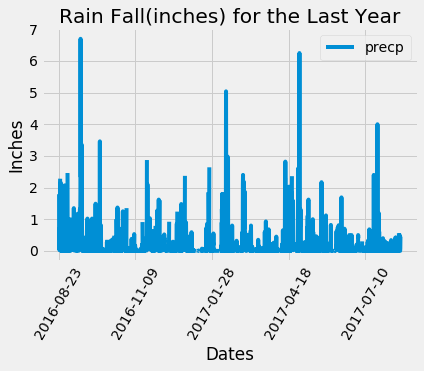

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("The last date is :", last_date)

# Calculate the date 1 year ago from the last data point in the database
first_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("First Date :", first_date)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()
for record in data:
    print(record)

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data, columns = ["date", "precp"])
data_df.set_index(data_df["date"], inplace=True)
#data_df = data_df[['precp']]

# Sort the dataframe by date
data_df = data_df.sort_index()
data_df.head(50)

# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(rot=60)
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.title('Rain Fall(inches) for the Last Year')
plt.savefig("Images/Rain_Fall_last_year.png")
plt.show()


In [117]:
# Use Pandas to print the summary statistics for the precipitation data.

statistics = data_df["precp"].describe()
statistics_df = pd.DataFrame(statistics)
statistics_df.rename(columns = {"precp": "precipitation"})

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [118]:
# Design a query to show how many stations are available in this dataset?


In [119]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [120]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [121]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [122]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [123]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [124]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [125]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [126]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [127]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [128]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [129]:
# Plot the daily normals as an area plot with `stacked=False`
